#### Ecommerce business Customer Segmentation

Problem statement

calculate the customer Value

1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary)
Recency, frequency, monetary value (RFM) is a model used in marketing analysis that
segments a company’s consumer base by their purchasing patterns or habits. In particular,
it evaluates customers’ recency (how long ago they made a purchase),
frequency (how often they make purchases), and monetary value (how much money they spend).

2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count

3.Recommendation  engine - selection of  product for customer.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
original_data=pd.read_excel('Ecommerce_business.xlsx')

In [4]:
df=original_data.copy()
df.head()

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_No        541909 non-null  object        
 1   Item_Code         541909 non-null  object        
 2   lower_floor       1816 non-null    object        
 3   Item_Description  540455 non-null  object        
 4   Quantity          541909 non-null  int64         
 5   InvoiceDate       541909 non-null  datetime64[ns]
 6   UnitPrice         541909 non-null  float64       
 7   CustomerID        406829 non-null  float64       
 8   Country           541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [6]:
df.isnull().sum()

Invoice_No               0
Item_Code                0
lower_floor         540093
Item_Description      1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
dtype: int64

# EDA

In [ ]:
#fIRST PROBLEM STATEMENT:- CUSTOMER SEGREGATION ON BASIS OF BUYING PATTERN( RFM- Recency, Frequency,Monetary)

In [7]:
df1=df.drop(['lower_floor','Item_Code','Item_Description','Country'],axis=1)
df1

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [8]:
df1.isnull().sum()

Invoice_No          0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [9]:
df1.dropna(inplace=True)

In [10]:
df1.shape

(406829, 5)

In [11]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [13]:
df1[df1['UnitPrice']==0]

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [14]:
df1[df1['UnitPrice']==0]['UnitPrice']

9302      0.0
33576     0.0
40089     0.0
47068     0.0
47070     0.0
56674     0.0
86789     0.0
130188    0.0
139453    0.0
145208    0.0
157042    0.0
187613    0.0
198383    0.0
279324    0.0
282912    0.0
285657    0.0
298054    0.0
314745    0.0
314746    0.0
314747    0.0
314748    0.0
358655    0.0
361825    0.0
379913    0.0
395529    0.0
420404    0.0
436428    0.0
436597    0.0
436961    0.0
439361    0.0
446125    0.0
446793    0.0
446794    0.0
454463    0.0
454464    0.0
479079    0.0
479546    0.0
480649    0.0
485985    0.0
502122    0.0
Name: UnitPrice, dtype: float64

In [15]:
#just discarding the return items only
df1=df1[df1['Quantity']>0]
df1

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [16]:
df1.shape

(397924, 5)

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [18]:
df[df['UnitPrice']==0]['Item_Description'].value_counts()

check                                  159
?                                       47
damages                                 45
damaged                                 43
found                                   25
                                      ... 
HEART GARLAND RUSTIC PADDED              1
CHICK GREY HOT WATER BOTTLE              1
mystery! Only ever imported 1800         1
MERCHANT CHANDLER CREDIT ERROR, STO      1
lost                                     1
Name: Item_Description, Length: 376, dtype: int64

In [ ]:
# create a total amount column (unit price*qty)
df1['totalamount']=df1['Quantity']*df1['UnitPrice']

In [ ]:
df1.head()

,Invoice_No,Quantity,InvoiceDate,UnitPrice,CustomerID,totalamount
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
df2=df1.drop(['Quantity','UnitPrice'],axis=1)

In [ ]:
df2

,Invoice_No,InvoiceDate,CustomerID,totalamount
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,10.20
541905,581587,2011-12-09 12:50:00,12680.0,12.60
541906,581587,2011-12-09 12:50:00,12680.0,16.60
541907,581587,2011-12-09 12:50:00,12680.0,16.60


In [ ]:
# we require to add all the total with respect to the common invoice no.

In [ ]:
df_final=df2.groupby(['Invoice_No','InvoiceDate','CustomerID']).agg({'totalamount':'sum'}).reset_index()

In [ ]:
df_final

,Invoice_No,InvoiceDate,CustomerID,totalamount
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [ ]:
# Recency ,Frequency ,Monetary

In [ ]:
#Recency= last business date - last purchase date(by a respective client)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice_No   18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   totalamount  18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [ ]:
max(df_final['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [ ]:
min(df_final['InvoiceDate'])

Timestamp('2010-12-01 08:26:00')

In [ ]:
# we have one year dataset

In [ ]:
# we have to create a variable last_business_date
#we will add 1 day extra in the max invoice date-- that will be our last business date

In [ ]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [ ]:
#Recency-->latest_business date-last transaction(particular customer)
#Frequency---> count the Cutomer ID (REPETATION OF THE cid)
#Monetary--> summation of total w.r.to Customer ID

In [ ]:
RFM_Score=df_final.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,'Invoice_No':lambda x:x.count(),
                                                                   'totalamount':lambda x:x.sum()}).reset_index()

In [ ]:
RFM_Score

,CustomerID,InvoiceDate,Invoice_No,totalamount
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,277,1,180.60
4335,18281.0,180,1,80.82
4336,18282.0,7,2,178.05
4337,18283.0,3,16,2094.88


In [ ]:
# lets rename the columns as Recency, Frequency and monetary

In [ ]:
dictt={'InvoiceDate':'Recency','Invoice_No':'Frequency','totalamount':'Monetary'}
RFM_Score.rename(columns=dictt,inplace=True)


In [ ]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4334,18280.0,277,1,180.60
4335,18281.0,180,1,80.82
4336,18282.0,7,2,178.05
4337,18283.0,3,16,2094.88


In [ ]:
# we will create  a column(r_marks--> recency marks) to give the effective marks,
#as high recency -- low marks low recency high marks

In [ ]:
RFM_Score['R_Marks']=RFM_Score['Recency'].rank(ascending=False)

In [ ]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R_Marks
0,12346.0,325,1,77183.60,162.5
1,12347.0,2,7,4310.00,4156.5
2,12348.0,75,4,1797.24,1646.0
3,12349.0,18,1,1757.55,3209.5
4,12350.0,310,1,334.40,227.5
...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0
4335,18281.0,180,1,80.82,860.0
4336,18282.0,7,2,178.05,3839.5
4337,18283.0,3,16,2094.88,4064.5


In [ ]:
RFM_Score['F_Marks']=RFM_Score['Frequency'].rank(ascending=True)
RFM_Score['M_Marks']=RFM_Score['Monetary'].rank(ascending=True)
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0
...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0
4335,18281.0,180,1,80.82,860.0,746.5,105.0
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0


In [ ]:
# we want to find the percentile
RFM_Score['F_Rank']=(RFM_Score['F_Marks']/RFM_Score['F_Marks'].max())*100


In [ ]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,F_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,17.204425
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,85.492049
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,69.785665
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,17.204425
4,12350.0,310,1,334.40,227.5,746.5,1230.0,17.204425
...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0,17.204425
4335,18281.0,180,1,80.82,860.0,746.5,105.0,17.204425
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0,44.030883
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0,96.393178


In [ ]:
RFM_Score['R_Rank']=(RFM_Score['R_Marks']/RFM_Score['R_Marks'].max())*100
RFM_Score['M_Rank']=(RFM_Score['M_Marks']/RFM_Score['M_Marks'].max())*100
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,F_Rank,R_Rank,M_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,17.204425,3.759833,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,85.492049,96.170754,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,69.785665,38.084220,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,17.204425,74.259602,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,17.204425,5.263767,28.347546
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0,17.204425,8.213790,12.998387
4335,18281.0,180,1,80.82,860.0,746.5,105.0,17.204425,19.898195,2.419912
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0,44.030883,88.836187,12.606591
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0,96.393178,94.042110,80.410233


In [ ]:
RFM= RFM_Score.copy()

In [ ]:
#which is more imp  give more weight
RFM['RFM_final']=0.20*RFM['R_Rank']+0.30*RFM['F_Rank']+0.50*RFM['M_Rank']
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,F_Rank,R_Rank,M_Rank,RFM_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,17.204425,3.759833,99.792579,55.809584
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,85.492049,96.170754,92.279327,91.021429
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,69.785665,38.084220,76.837981,66.971534
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,17.204425,74.259602,76.192671,58.109583
4,12350.0,310,1,334.40,227.5,746.5,1230.0,17.204425,5.263767,28.347546,20.387854


In [ ]:
RFM=RFM.round(2)
RFM

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,F_Rank,R_Rank,M_Rank,RFM_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,17.20,3.76,99.79,55.81
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,85.49,96.17,92.28,91.02
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,69.79,38.08,76.84,66.97
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,17.20,74.26,76.19,58.11
4,12350.0,310,1,334.40,227.5,746.5,1230.0,17.20,5.26,28.35,20.39
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0,17.20,8.21,13.00,13.30
4335,18281.0,180,1,80.82,860.0,746.5,105.0,17.20,19.90,2.42,10.35
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0,44.03,88.84,12.61,37.28
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0,96.39,94.04,80.41,87.93


In [ ]:
# LETS CREATE 4 GROUPS -- 4 no of clusters(we can use kmeans to get it also)

In [ ]:
#quantile approach

In [ ]:
quant=RFM['RFM_final'].quantile(q=[0.25,0.50,0.75])
quant

0.25    27.725
0.50    48.780
0.75    71.490
Name: RFM_final, dtype: float64

In [ ]:
#we can create 5 groups also
quant5=RFM['RFM_final'].quantile(q=[0.10,0.25,0.50,0.75,0.90])
quant5

0.10    16.454
0.25    27.725
0.50    48.780
0.75    71.490
0.90    86.016
Name: RFM_final, dtype: float64

In [ ]:
#visualization approach
#step function -- ECDF--(emperical cummulative distribution function)(non paramatric),it add on values

<Axes: xlabel='RFM_final', ylabel='Proportion'>

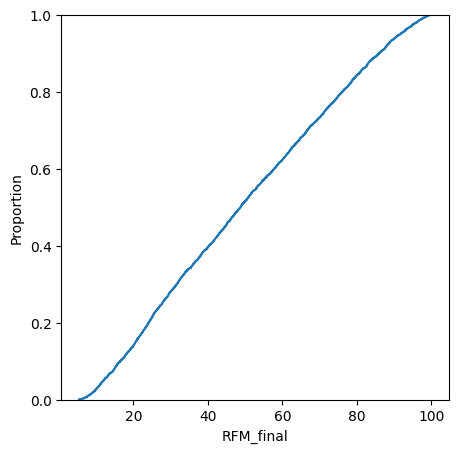

In [ ]:
plt.figure(figsize=(5,5))
sns.ecdfplot(data=RFM['RFM_final'])

In [ ]:
def cust_category(x):
    if x<=27.72:
        return 'silver'
    if x<=48.78:
        return 'gold'
    if x<=71.49:
        return 'Diamond'
    else:
        return 'Platinum'

In [ ]:
RFM['Group']=RFM['RFM_final'].apply(cust_category)
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,F_Rank,R_Rank,M_Rank,RFM_final,Group
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,17.20,3.76,99.79,55.81,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,85.49,96.17,92.28,91.02,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,69.79,38.08,76.84,66.97,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,17.20,74.26,76.19,58.11,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,17.20,5.26,28.35,20.39,silver
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,88.22,57.90,83.84,79.97,Platinum
6,12353.0,204,1,89.00,725.5,746.5,117.0,17.20,16.79,2.70,9.87,silver
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,17.20,13.94,64.07,39.98,gold
8,12355.0,214,1,459.40,672.5,746.5,1660.0,17.20,15.56,38.26,27.40,silver
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,59.50,70.28,86.17,74.99,Platinum


In [ ]:
RFM['Group'].value_counts()

Platinum    1085
silver      1085
gold        1085
Diamond     1084
Name: Group, dtype: int64

In [ ]:
#kmeans clustering
final_data=pd.DataFrame(RFM['RFM_final'])
final_data

,RFM_final
0,55.81
1,91.02
2,66.97
3,58.11
4,20.39
...,...
4334,13.30
4335,10.35
4336,37.28
4337,87.93


In [ ]:
# kmeans is widely used clustering approach . it minimized the variance  within the cluster.
#centorid based algo.unsupervised

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler


In [ ]:
scaled = MinMaxScaler()
final_data_scaled=scaled.fit_transform(final_data)
final_data_scaled

array([[0.53342501],
       [0.90585995],
       [0.65147028],
       ...,
       [0.33742331],
       [0.87317538],
       [0.65644172]])

In [ ]:
final_data_scaled=pd.DataFrame(final_data_scaled,columns=final_data.columns)
final_data_scaled

,RFM_final
0,0.533425
1,0.905860
2,0.651470
3,0.557753
4,0.158769
...,...
4334,0.083774
4335,0.052570
4336,0.337423
4337,0.873175


# Data Mining

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'sum of squares error')

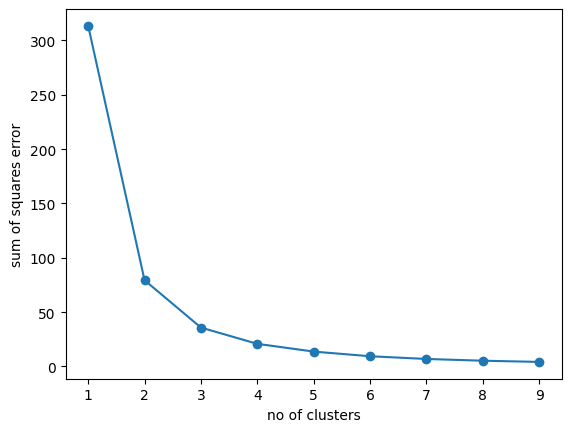

In [ ]:
SSE=[]
for i in range(1,10):
    kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans1.fit_predict(final_data_scaled)
    SSE.append(kmeans1.inertia_)

plt.plot(range(1,10),SSE,marker='o')
plt.xlabel("no of clusters")
plt.ylabel("sum of squares error")

In [ ]:
#calculate the silhouette score w.r.t clusters

In [ ]:
for i in range(2,9):
    kmeans2=KMeans(max_iter=100, random_state=100,n_clusters=i)
    kmeans2.fit(final_data_scaled)
    silhouette=silhouette_score(final_data_scaled, kmeans2.labels_)
    print('for {} score{}'.format(i,silhouette))


for 2 score0.6256262261585409
for 3 score0.5884544423323724
for 4 score0.5633324533135928
for 5 score0.5452239191592716
for 6 score0.5450751496194505
for 7 score0.5428077260671375
for 8 score0.5393158399413998


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

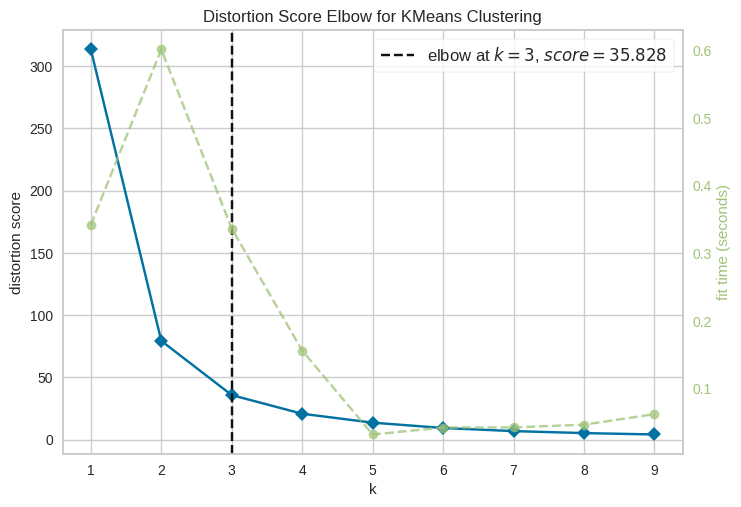

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model =KMeans()
visualizer= KElbowVisualizer(model,k=(1,10)).fit(final_data_scaled)
visualizer.show()

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=101)
y_kmeans=kmeans.fit_predict(final_data_scaled)
y_kmeans

array([3, 1, 3, ..., 0, 1, 3], dtype=int32)

In [ ]:
RFM['cluster']=y_kmeans
RFM.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,F_Rank,R_Rank,M_Rank,RFM_final,Group,cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,17.20,3.76,99.79,55.81,Diamond,3
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,85.49,96.17,92.28,91.02,Platinum,1
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,69.79,38.08,76.84,66.97,Diamond,3
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,17.20,74.26,76.19,58.11,Diamond,3
4,12350.0,310,1,334.40,227.5,746.5,1230.0,17.20,5.26,28.35,20.39,silver,2
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,88.22,57.90,83.84,79.97,Platinum,1
6,12353.0,204,1,89.00,725.5,746.5,117.0,17.20,16.79,2.70,9.87,silver,2
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,17.20,13.94,64.07,39.98,gold,0
8,12355.0,214,1,459.40,672.5,746.5,1660.0,17.20,15.56,38.26,27.40,silver,2
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,59.50,70.28,86.17,74.99,Platinum,1


In [ ]:
RFM['cluster'].value_counts()

2    1235
0    1119
3    1030
1     955
Name: cluster, dtype: int64

In [ ]:
RFM['Group'].value_counts()

Platinum    1085
silver      1085
gold        1085
Diamond     1084
Name: Group, dtype: int64

In [ ]:
#  algometative

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean")
y_ag=cluster.fit_predict(final_data_scaled)

In [ ]:
RFM1=RFM.copy()

In [ ]:
RFM1['cluster']=y_ag
RFM1.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,F_Rank,R_Rank,M_Rank,RFM_final,Group,cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,17.20,3.76,99.79,55.81,Diamond,2
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,85.49,96.17,92.28,91.02,Platinum,0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,69.79,38.08,76.84,66.97,Diamond,2
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,17.20,74.26,76.19,58.11,Diamond,2
4,12350.0,310,1,334.40,227.5,746.5,1230.0,17.20,5.26,28.35,20.39,silver,1
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,88.22,57.90,83.84,79.97,Platinum,0
6,12353.0,204,1,89.00,725.5,746.5,117.0,17.20,16.79,2.70,9.87,silver,1
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,17.20,13.94,64.07,39.98,gold,3
8,12355.0,214,1,459.40,672.5,746.5,1660.0,17.20,15.56,38.26,27.40,silver,1
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,59.50,70.28,86.17,74.99,Platinum,0


In [ ]:
RFM1['cluster'].value_counts()

1    1482
0    1240
2     871
3     746
Name: cluster, dtype: int64

In [ ]:
silhouette=silhouette_score(final_data_scaled,cluster.labels_)
print('for {} score{}'.format(4,silhouette))

for 4 score0.5296289550195749


### GOAL NO 2 :- Analysing the business sales trend-
###            (1)when is the heighest slaes (Month/season/day/timing)
### (2)when is the rush hour- month/season day/ morning /afternon/evening /weekdays/weekends

In [ ]:
df_final.head()

,Invoice_No,InvoiceDate,CustomerID,totalamount
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
import datetime as dt

In [ ]:
#extraction of day from datetime(invoicedate)

df_final['Day']=df_final['InvoiceDate'].dt.day_name()
df_final.tail(20)

,Invoice_No,InvoiceDate,CustomerID,totalamount,Day
18546,581502,2011-12-09 10:51:00,15910.0,133.35,Friday
18547,581514,2011-12-09 11:20:00,17754.0,200.99,Friday
18548,581516,2011-12-09 11:26:00,14422.0,382.01,Friday
18549,581538,2011-12-09 11:34:00,14446.0,197.09,Friday
18550,581566,2011-12-09 11:50:00,18102.0,469.44,Friday
18551,581567,2011-12-09 11:56:00,16626.0,389.21,Friday
18552,581570,2011-12-09 11:59:00,12662.0,224.95,Friday
18553,581571,2011-12-09 12:00:00,15311.0,494.60,Friday
18554,581572,2011-12-09 12:08:00,16705.0,250.52,Friday
18555,581574,2011-12-09 12:09:00,12526.0,277.08,Friday


In [ ]:
df_final['Day'].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [ ]:
df_final['Month']=df_final['InvoiceDate'].dt.month
df_final['Hour']=df_final['InvoiceDate'].dt.hour

df_final.head(20)

,Invoice_No,InvoiceDate,CustomerID,totalamount,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8
5,536370,2010-12-01 08:45:00,12583.0,855.86,Wednesday,12,8
6,536371,2010-12-01 09:00:00,13748.0,204.00,Wednesday,12,9
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday,12,9
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday,12,9
9,536374,2010-12-01 09:09:00,15100.0,350.40,Wednesday,12,9


In [ ]:
#create a weekday/weekend column

df_final['Weekday']=df_final['InvoiceDate'].dt.weekday
df_final.tail(20)

,Invoice_No,InvoiceDate,CustomerID,totalamount,Day,Month,Hour,Weekday
18546,581502,2011-12-09 10:51:00,15910.0,133.35,Friday,12,10,4
18547,581514,2011-12-09 11:20:00,17754.0,200.99,Friday,12,11,4
18548,581516,2011-12-09 11:26:00,14422.0,382.01,Friday,12,11,4
18549,581538,2011-12-09 11:34:00,14446.0,197.09,Friday,12,11,4
18550,581566,2011-12-09 11:50:00,18102.0,469.44,Friday,12,11,4
18551,581567,2011-12-09 11:56:00,16626.0,389.21,Friday,12,11,4
18552,581570,2011-12-09 11:59:00,12662.0,224.95,Friday,12,11,4
18553,581571,2011-12-09 12:00:00,15311.0,494.60,Friday,12,12,4
18554,581572,2011-12-09 12:08:00,16705.0,250.52,Friday,12,12,4
18555,581574,2011-12-09 12:09:00,12526.0,277.08,Friday,12,12,4


In [ ]:
df_final['Weekday'].value_counts()

3    4038
2    3462
1    3189
0    2865
4    2835
6    2177
Name: Weekday, dtype: int64

In [ ]:
df_final['Weekend']=np.where((df_final['Day']=='Saturday')|(df_final['Day']=='Sunday'),"Yes","No")

In [ ]:
df_final

,Invoice_No,InvoiceDate,CustomerID,totalamount,Day,Month,Hour,Weekday,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,2,No
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,2,No
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,2,No
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,2,No
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,2,No
...,...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,12,12,4,No
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,12,12,4,No
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,12,12,4,No
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,12,12,4,No


In [ ]:
df_final['Weekend'].value_counts()

No     16389
Yes     2177
Name: Weekend, dtype: int64

In [ ]:
#creation of seasion, timing


def cal_season(x):
  if x in [11,12,1,2]:
     return 'winter'
  elif x in [3,4]:
     return 'spring'
  elif x in [5,6,7]:
     return 'summer'
  else:
      return "Monsoon"

In [ ]:
def cal_timing(x):
  if x in range(22,4):
     return 'late night'
  elif x in range(4,11):
     return 'Morning'
  elif x in range(11,16):
     return 'Afternoon'
  else:
      return "Evening"

In [ ]:
df_final['Season']=df_final['Month'].apply(cal_season)

In [ ]:
df_final['Timing']=df_final['Hour'].apply(cal_timing)

In [ ]:
df_final

,Invoice_No,InvoiceDate,CustomerID,totalamount,Day,Month,Hour,Weekday,Weekend,Season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,2,No,winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,2,No,winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,2,No,winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,2,No,winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,2,No,winter,Morning
...,...,...,...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,12,12,4,No,winter,Afternoon
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,12,12,4,No,winter,Afternoon
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,12,12,4,No,winter,Afternoon
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,12,12,4,No,winter,Afternoon


In [ ]:
df_final['Season'].value_counts()

winter     6835
Monsoon    4970
summer     4284
spring     2477
Name: Season, dtype: int64

In [ ]:
df_final['Timing'].value_counts()

Afternoon    12374
Morning       4210
Evening       1982
Name: Timing, dtype: int64

In [ ]:
#Plotting the pie chart for day wise business activity

In [ ]:
day_count=df_final.groupby("Day")['Invoice_No'].count().to_frame("count no. of invoice ").reset_index()
day_count

,Day,count no. of invoice
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


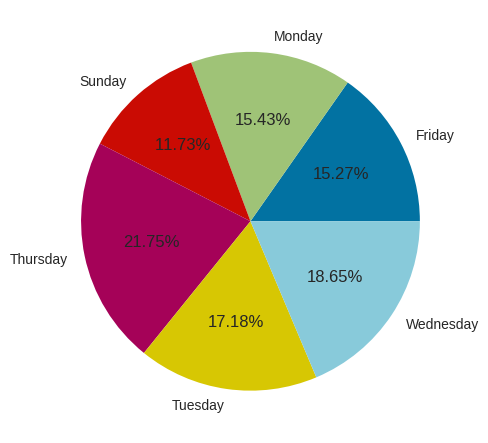

In [ ]:
plt.pie(day_count["count no. of invoice "],labels = day_count['Day'],autopct='%.2f%%')
plt.show()

In [ ]:
#bar chart

day=df_final['Day'].value_counts()

In [ ]:
day

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [ ]:
day.index

Index(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday'], dtype='object')

In [ ]:
day.values

array([4038, 3462, 3189, 2865, 2835, 2177])

Text(0, 0.5, 'no of invoice')

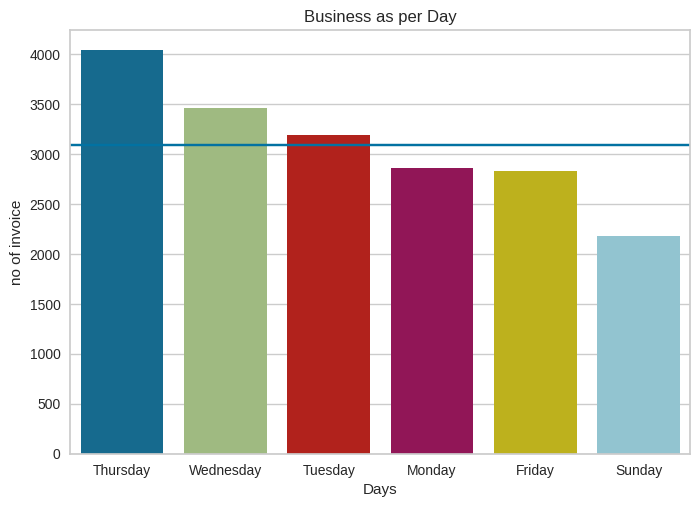

In [ ]:
sns.barplot(x=day.index,y=day.values)
plt.axhline(y=day.mean())
plt.title("Business as per Day")
plt.xlabel("Days")
plt.ylabel("no of invoice")

In [ ]:
mon_count=df_final.groupby("Month")['Invoice_No'].count().to_frame("count no. of invoice ").reset_index()
mon_count

,Month,count no. of invoice
0,1,993
1,2,1003
2,3,1324
3,4,1153
4,5,1559
5,6,1394
6,7,1331
7,8,1283
8,9,1757
9,10,1930


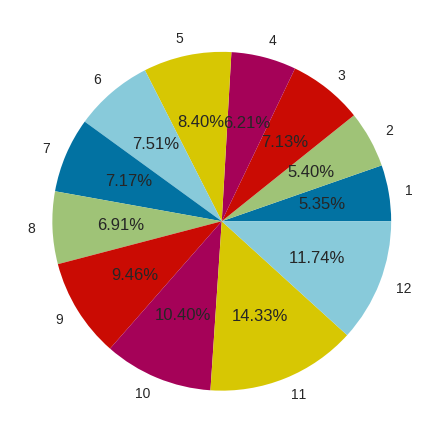

In [ ]:
plt.pie(mon_count["count no. of invoice "],labels = mon_count['Month'],autopct='%.2f%%')
plt.show()

In [ ]:
mon=df_final['Month'].value_counts()

Text(0, 0.5, 'no of invoice')

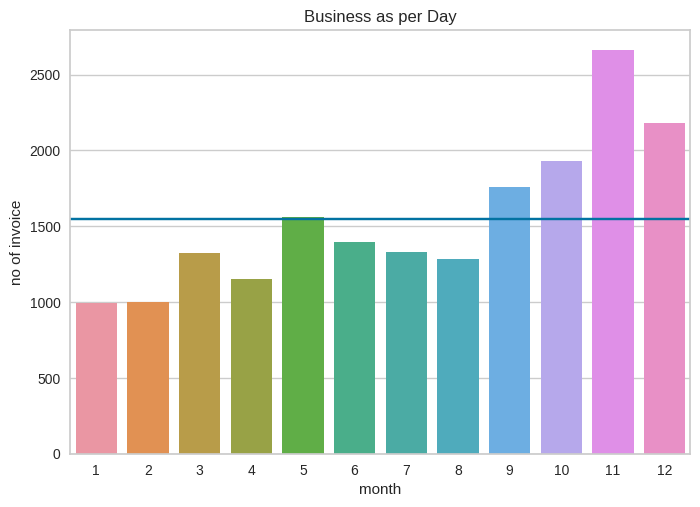

In [ ]:
sns.barplot(x=mon.index,y=mon.values)
plt.axhline(y=mon.mean())
plt.title("Business as per Day")
plt.xlabel("month")
plt.ylabel("no of invoice")

In [ ]:
t_count=df_final.groupby("Timing")['Invoice_No'].count().to_frame("count no. of invoice ").reset_index()
t_count

,Timing,count no. of invoice
0,Afternoon,12374
1,Evening,1982
2,Morning,4210


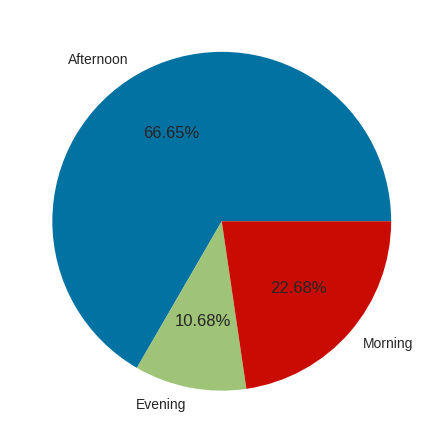

In [ ]:
plt.pie(t_count["count no. of invoice "],labels = t_count['Timing'],autopct='%.2f%%')
plt.show()

In [ ]:
t=df_final['Timing'].value_counts()

Text(0, 0.5, 'no of invoice')

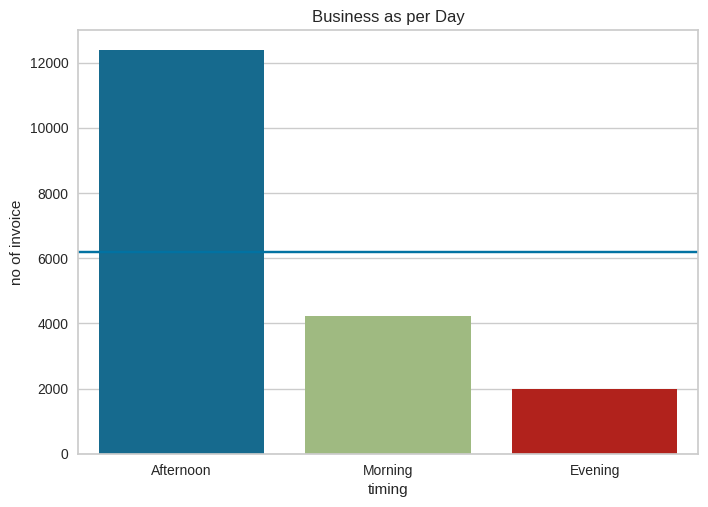

In [ ]:
sns.barplot(x=t.index,y=t.values)
plt.axhline(y=t.mean())
plt.title("Business as per Day")
plt.xlabel("timing")
plt.ylabel("no of invoice")

In [ ]:
s_count=df_final.groupby("Season")['Invoice_No'].count().to_frame("count no. of invoice ").reset_index()
s_count

,Season,count no. of invoice
0,Monsoon,4970
1,spring,2477
2,summer,4284
3,winter,6835


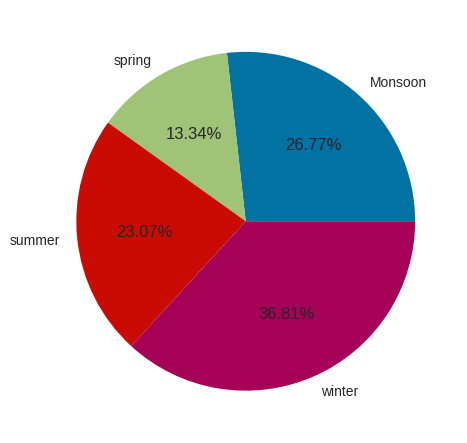

In [ ]:
plt.pie(s_count["count no. of invoice "],labels = s_count['Season'],autopct='%.2f%%')
plt.show()

In [ ]:
s=df_final['Season'].value_counts()

Text(0, 0.5, 'no of invoice')

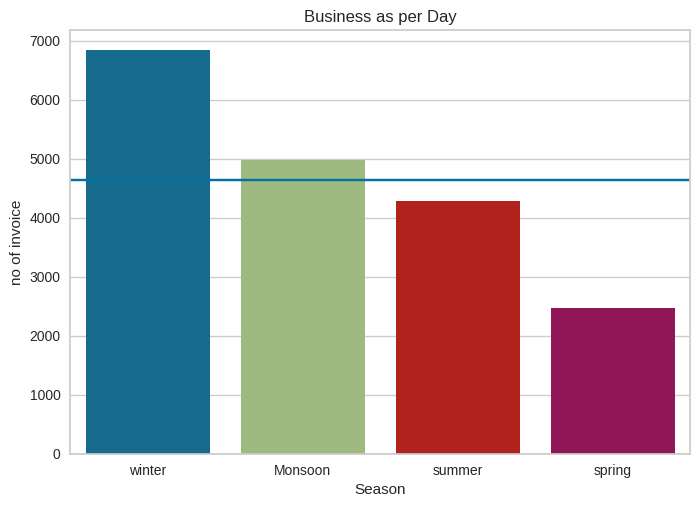

In [ ]:
sns.barplot(x=s.index,y=s.values)
plt.axhline(y=s.mean())
plt.title("Business as per Day")
plt.xlabel("Season")
plt.ylabel("no of invoice")

In [ ]:
#lets plot agraph weekend with timing

timing=df_final['Timing'].value_counts()


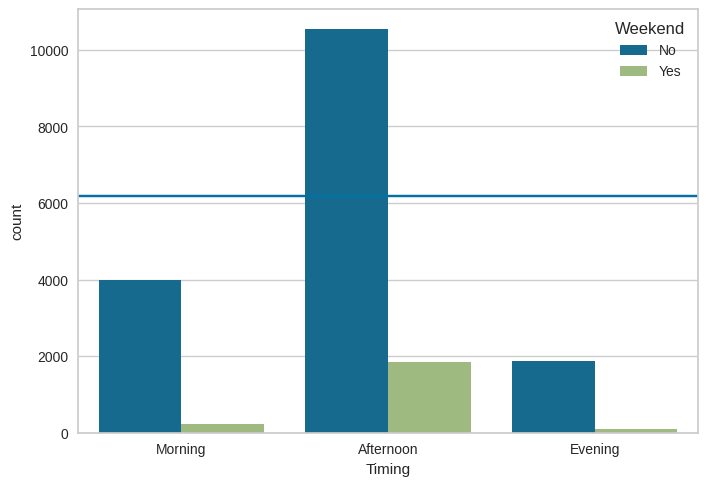

In [ ]:
sns.countplot(x=df_final['Timing'],hue=df_final['Weekend'])
plt.axhline(y=timing.mean())

In [ ]:
# find the best selling products

In [ ]:
df_top_sale=df.drop(['lower_floor','CustomerID'],axis=1)


In [ ]:
df_top_sale

,Invoice_No,Item_Code,Item_Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


In [ ]:
df_top_sale['Total']=df_top_sale["Quantity"]*df_top_sale["UnitPrice"]

In [ ]:
df_top_sale.drop(['Total','UnitPrice'],axis=1,inplace=True)

In [ ]:
df_top_sale

,Invoice_No,Item_Code,Item_Description,Quantity,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,France


In [ ]:
#create a pivot table

df_top_pivot= df_top_sale.pivot_table(values="Quantity",index=['Item_Description'],aggfunc="sum",sort=True).reset_index()

In [ ]:
df_top_pivot

,Item_Description,Quantity
0,20713,-400
1,4 PURPLE FLOCK DINNER CANDLES,144
2,50'S CHRISTMAS GIFT BAG LARGE,1913
3,DOLLY GIRL BEAKER,2448
4,I LOVE LONDON MINI BACKPACK,389
...,...,...
4218,wrongly marked carton 22804,-256
4219,wrongly marked. 23343 in box,-3100
4220,wrongly sold (22719) barcode,170
4221,wrongly sold as sets,-600


In [ ]:
df_top_pivot['Quantity'].value_counts()

 1       72
 2       65
 4       47
 3       45
 12      43
         ..
 907      1
 4841     1
 6521     1
 4325     1
-975      1
Name: Quantity, Length: 1974, dtype: int64

In [ ]:
#best selling
df_top_pivot.sort_values(by='Quantity',ascending= False)


,Item_Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
...,...,...
1123,Damaged,-7540
2796,Printing smudges/thrown away,-9058
4116,check,-12030
3740,"Unsaleable, destroyed.",-15644


In [ ]:
#we can do the same by using groupby fun

In [ ]:
df_top_sale.groupby("Item_Description").sum().reset_index().sort_values(by='Quantity',ascending=False)

,Item_Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
...,...,...
1123,Damaged,-7540
2796,Printing smudges/thrown away,-9058
4116,check,-12030
3740,"Unsaleable, destroyed.",-15644


In [ ]:
#--top selling product by country wise
#-- top  selling as per country

In [ ]:
df_top_sale.groupby(["Country",'Item_Description']).sum().reset_index().sort_values(by='Quantity',ascending=False)

,Country,Item_Description,Quantity
19618,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
17488,United Kingdom,JUMBO BAG RED RETROSPOT,43167
18355,United Kingdom,POPCORN HOLDER,34365
15872,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,33679
19528,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,33193
...,...,...,...
16748,United Kingdom,Damaged,-7540
18410,United Kingdom,Printing smudges/thrown away,-9058
19725,United Kingdom,check,-12030
19351,United Kingdom,"Unsaleable, destroyed.",-15644


In [ ]:
df_top_sale.groupby("Country").sum().sort_values(by='Quantity',ascending=False).reset_index()

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


In [ ]:
#Recommendation engine
#1)collaberative filtering approach
#2)contentbased filtering(similarity in words)


In [ ]:
df100=original_data.copy()
df100.head()

,Invoice_No,Item_Code,lower_floor,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df100.drop(["lower_floor"],axis=1,inplace=True)

In [ ]:
df100.dropna(axis=0,inplace=True)

In [ ]:
df100.isnull().sum()

Invoice_No          0
Item_Code           0
Item_Description    0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

In [ ]:
# Recommendation engine-- collaborative filteration

In [ ]:
df100.shape

(406829, 8)

In [ ]:
# approach
# (1)Degree of similarity between the customer --- based on the product purchased.
# "cosine_similarity"--- available in library "sklearn pairwise"
# (2)Create a pivot table -- customer id -- item purchased, quantity

In [ ]:
# create a pivot table

In [ ]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="Item_Code",values="Quantity",aggfunc="sum")

In [ ]:
custID_matrix.head(10)

Item_Code,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,7.0
12353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# apply the map approach to chnage Nan as 0

In [ ]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)

In [ ]:
custID_matrix.head(10)

Item_Code,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12353.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
custID_matrix.shape

(4372, 3684)

In [ ]:
# degree of similarity between the customers

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(custID_matrix)

In [ ]:
similarity.shape

(4372, 4372)

In [ ]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [ ]:
similarity[1]

array([0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
       0.01282789])

In [ ]:
# the degree of similarity -- is very similar to correlation matrix

In [ ]:
similarity[90]

array([0.        , 0.08549917, 0.09249946, ..., 0.        , 0.16720631,
       0.        ])

In [ ]:
sorted(similarity[90],reverse=True)

[1.0,
 0.39852669849304295,
 0.3360672201667223,
 0.3076976944152481,
 0.2878618594532406,
 0.2840286409986905,
 0.2733066872302625,
 0.27136385947023145,
 0.2608969660436018,
 0.260359587582133,
 0.26035958758213296,
 0.2585177720346051,
 0.25788600255038785,
 0.2510482226267169,
 0.2487027691989384,
 0.24549951047446422,
 0.23335334047877918,
 0.23157109275259727,
 0.228629598286551,
 0.2259355204958592,
 0.22389255735252045,
 0.22348267517713433,
 0.22140372138502384,
 0.21917850187980234,
 0.21917850187980234,
 0.2172315411805112,
 0.21713578721419133,
 0.21505687158090042,
 0.21397888548644758,
 0.21363273446095687,
 0.21257273055451176,
 0.2120181879653131,
 0.20745595841899625,
 0.20567663600479225,
 0.20487876571761976,
 0.20466441859899687,
 0.20372992503051973,
 0.20239529495936104,
 0.20094315430117096,
 0.19916050364005933,
 0.19896221535915068,
 0.19664040749943115,
 0.19622098205031857,
 0.19489887528440333,
 0.19480930197663146,
 0.19473101465156206,
 0.1944611170656493,

In [ ]:
sorted(similarity[1],reverse=True)

[0.9999999999999998,
 0.3016942450159237,
 0.25618561232271625,
 0.24135539601273895,
 0.2260500394542122,
 0.22345167681715758,
 0.20901990428748535,
 0.20901990428748535,
 0.2090199042874853,
 0.20582857330483192,
 0.20545535708970802,
 0.20527090638366416,
 0.20483070374906112,
 0.20301807798570298,
 0.20253250967617065,
 0.2009630153539641,
 0.19706585563285864,
 0.19706585563285864,
 0.19118196187694053,
 0.18962670799619144,
 0.18620973068096464,
 0.1860064818694242,
 0.18589221376496495,
 0.1830068932245063,
 0.18297105352446882,
 0.18262407695816257,
 0.1819284749322488,
 0.18064370099678706,
 0.17989569074028866,
 0.17989569074028863,
 0.1793658053750101,
 0.17875426781973033,
 0.1786060992694684,
 0.17823981088269877,
 0.17737312788653103,
 0.17418325357290443,
 0.17418325357290443,
 0.17391507288487007,
 0.17282916171446358,
 0.17245489460214786,
 0.1724326236787513,
 0.1724326236787513,
 0.1724326236787513,
 0.17181330295762648,
 0.17152381108735995,
 0.17137366203368287,
 

In [ ]:
# lets convert the similarity into DataFrame

In [ ]:
customer=pd.DataFrame(similarity,columns=custID_matrix.index)

In [ ]:
customer.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
customer=customer.set_index(custID_matrix.index)

In [ ]:
customer.head(10)

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.000000,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.000000,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.000000,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.000000,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
12352.0,0.0,0.038814,0.027995,0.138314,0.031846,1.000000,0.000000,0.103448,0.036418,0.090182,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.037905,0.072870,0.034189
12353.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.138675,0.068680,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12354.0,0.0,0.025876,0.027995,0.030737,0.000000,0.103448,0.000000,1.000000,0.000000,0.054109,...,0.0,0.0,0.000000,0.0,0.000000,0.041523,0.049629,0.000000,0.113354,0.000000
12355.0,0.0,0.136641,0.118262,0.032461,0.000000,0.036418,0.138675,0.000000,1.000000,0.152388,...,0.0,0.0,0.153846,0.0,0.000000,0.000000,0.000000,0.160128,0.034204,0.108324


In [ ]:
customer.loc[12356.0].sort_values(ascending=False)

CustomerID
12356.0    1.000000
12528.0    0.388514
17180.0    0.318540
16954.0    0.304061
12569.0    0.257775
             ...   
15400.0    0.000000
15405.0    0.000000
15406.0    0.000000
15408.0    0.000000
18287.0    0.000000
Name: 12356.0, Length: 4372, dtype: float64

In [ ]:
# here the highest similar customer for cust id 12356.0 is cust id 12528.0

In [ ]:
Customer A--->cust id 12356.0
Customer B--->cust id 12528.0

In [ ]:
# LETS FIND THE ITEMS CUSTOMER A HAS PURCHASED

# we have to use custID_matrix

In [ ]:
# list of items purchased by Customer A
item_cust_A=set(custID_matrix.loc[12356].iloc[custID_matrix.loc[12356].to_numpy().nonzero()].index)

In [ ]:
item_cust_A

{20971,
 21080,
 21086,
 21094,
 21114,
 21122,
 21124,
 21125,
 21198,
 21199,
 21212,
 21213,
 21231,
 21383,
 21527,
 21843,
 22055,
 22059,
 22060,
 22062,
 22066,
 22131,
 22132,
 22138,
 22195,
 22423,
 22435,
 22646,
 22649,
 22698,
 22699,
 22857,
 22937,
 22938,
 22951,
 22957,
 22967,
 37447,
 37448,
 37450,
 37500,
 37501,
 84375,
 84378,
 84380,
 84457,
 '84535B',
 '84569D',
 84987,
 84991,
 84992,
 '85184C',
 'POST'}

In [ ]:
# list of items purchased by Customer B
item_cust_B=set(custID_matrix.loc[12528].iloc[custID_matrix.loc[12528].to_numpy().nonzero()].index)

In [ ]:
len(item_cust_B)

50

In [ ]:
len(item_cust_A)

53

In [ ]:
df100.head(2)

,Invoice_No,Item_Code,Item_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Display the item code along with Item_description

In [ ]:
ITEM_A=df100.loc[df100["Item_Code"].isin(item_cust_A),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [ ]:
ITEM_A

,Item_Description
Item_Code,
POST,POSTAGE
21094,SET/6 RED SPOTTY PAPER PLATES
21212,PACK OF 72 RETROSPOT CAKE CASES
84991,60 TEATIME FAIRY CAKE CASES
22646,CERAMIC STRAWBERRY CAKE MONEY BANK
22195,LARGE HEART MEASURING SPOONS
21080,SET/20 RED RETROSPOT PAPER NAPKINS
21086,SET/6 RED SPOTTY PAPER CUPS
21122,SET/10 PINK POLKADOT PARTY CANDLES


In [ ]:
ITEM_B=df100.loc[df100["Item_Code"].isin(item_cust_B),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [ ]:
ITEM_B

,Item_Description
Item_Code,
POST,POSTAGE
21212,PACK OF 72 RETROSPOT CAKE CASES
84991,60 TEATIME FAIRY CAKE CASES
47580,TEA TIME DES TEA COSY
22646,CERAMIC STRAWBERRY CAKE MONEY BANK
22838,3 TIER CAKE TIN RED AND CREAM
48185,DOORMAT FAIRY CAKE
21232,STRAWBERRY CERAMIC TRINKET BOX
21122,SET/10 PINK POLKADOT PARTY CANDLES


In [ ]:
Recommended_for_A=item_cust_B-item_cust_A

In [ ]:
Recommended_for_A

{'15060B',
 '16156S',
 21108,
 21121,
 21215,
 21217,
 21232,
 21884,
 22215,
 22220,
 22221,
 22720,
 22838,
 22847,
 22851,
 37446,
 37449,
 37495,
 '47559B',
 '47566B',
 '47567B',
 '47570B',
 47580,
 '47585A',
 '47591D',
 '47599A',
 '47599B',
 48185,
 '84509G',
 '84536B'}

In [ ]:
Recommended_for_A=df100.loc[df100["Item_Code"].isin(Recommended_for_A),["Item_Code","Item_Description"]].drop_duplicates().set_index("Item_Code")

In [ ]:
Recommended_for_A

,Item_Description
Item_Code,
47580,TEA TIME DES TEA COSY
22838,3 TIER CAKE TIN RED AND CREAM
48185,DOORMAT FAIRY CAKE
21232,STRAWBERRY CERAMIC TRINKET BOX
22851,SET 20 NAPKINS FAIRY CAKES DESIGN
21108,FAIRY CAKE FLANNEL ASSORTED COLOUR
47570B,TEA TIME TABLE CLOTH
21121,SET/10 RED POLKADOT PARTY CANDLES
47599A,PINK PARTY BAGS


In [ ]:
len(Recommended_for_A)

32